# [La librairie H3](https://h3geo.org/docs/)

### 0. installation des packages si nécessaire

Le point d'exclamation est pour rendre opérationnel aux commandes shell

In [1]:
# peut prendre du temps, a ne lancer qu'une fois
!conda config --add channels conda-forge
!conda install -y h3-py folium geojson
# à commenter après usage

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - folium
    - geojson
    - h3-py


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.6.0               |     pyhd8ed1ab_0          27 KB  conda-forge
    folium-0.13.0              |     pyhd8ed1ab_0          66 KB  conda-forge
    h3-py-3.7.4                |   py39h7a8716b_1         482 KB  conda-forge
    openssl-1.1.1s             |       hfd90126_0         1.9 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

  _anaconda_depends  pkgs/main/osx-64::_anaconda_depends-2022.05-py39_0
  branca             conda-forge/noarch::branca-0.6.0-pyhd8ed1ab_0
  folium             conda-forge/noarch::folium-0.13.0-pyhd8ed1ab_0
  geoj

## 1. Utilisation de pandas pour gérer les données de population

In [2]:
import pandas as pd

### on se propose de travailler sur l'année 2010

In [3]:
# un jeu de données présent dans le répertoire courant
dataset = pd.read_csv("popfr19752010.csv")

In [4]:
type(dataset)

pandas.core.frame.DataFrame

+ reg : code region INSEE (character)
+ dep : code departement INSEE (character, corse 201 et 202 au lieu de 2A et 2B)
+ com : code commune INSEE (character)
+ article : article du nom de la commune (character)
+ com_nom : nom de la commune (character)
+ long : longitude (numeric)
+ lat : latitude (numeric)
+ pop_i : estimation de la population à la date i (ramenée à 1 si <=0), i=1975,…,2010 (numeric)


In [5]:
dataset.head()

reg  dep  com article                     com_nom      long        lat  \
0   11   75   56     NaN                       PARIS  2.352222  48.856614   
1   11   77    1     NaN            ACHERES-LA-FORET  2.570289  48.354976   
2   11   77   10     NaN  AUBEPIERRE-OZOUER-LE-REPOS  2.890552  48.632323   
3   11   77  100      LE            CHATELET-EN-BRIE  2.792095  48.504945   
4   11   77  101     NaN          CHATENAY-SUR-SEINE  3.096229  48.418774   

       pop_1975      pop_1976      pop_1977  ...      pop_2001      pop_2002  \
0  2.294116e+06  2.277408e+06  2.261510e+06  ...  2.142425e+06  2.149205e+06   
1  6.482592e+02  6.620875e+02  6.763429e+02  ...  1.106389e+03  1.126294e+03   
2  5.874394e+02  5.995405e+02  6.118238e+02  ...  8.738642e+02  8.797754e+02   
3  2.251402e+03  2.481846e+03  2.695300e+03  ...  4.408286e+03  4.407891e+03   
4  5.071603e+02  5.391894e+02  5.699313e+02  ...  9.284420e+02  9.278621e+02   

       pop_2003      pop_2004      pop_2005      pop_2006      pop_2007  \
0  2.156989e+06  2.165785e+06  2.175600e+06  2.186440e+06  2.198315e+06   
1  1.146224e+03  1.166163e+03  1.186095e+03  1.206006e+03  1.225880e+03   
2  8.849946e+02  8.894883e+02  8.932229e+02  8.961646e+02  8.982798e+02   
3  4.407379e+03  4.407398e+03  4.408599e+03  4.411630e+03  4.417140e+03   
4  9.260636e+02  9.230492e+02  9.188215e+02  9.133832e+02  9.067369e+02   

       pop_2008      pop_2009      pop_2010  
0  2.211230e+06  2.225194e+06  2.240213e+06  
1  1.245702e+03  1.265455e+03  1.285127e+03  
2  8.995351e+02  8.998966e+02  8.993365e+02  
3  4.425779e+03  4.438194e+03  4.454928e+03  
4  8.988853e+02  8.898310e+02  8.795762e+02  

[5 rows x 43 columns]

In [6]:
# description générale
dataset.describe()

reg           dep           com          long           lat  \
count  36318.000000  36318.000000  36318.000000  36318.000000  36318.000000   
mean      49.644969     47.574453    251.244755      2.732537     46.973237   
std       25.363154     29.592749    180.946130      2.657415      2.210865   
min       11.000000      1.000000      1.000000     -5.097626     41.387174   
25%       25.000000     25.000000    106.000000      0.666670     45.164214   
50%       43.000000     49.000000    218.000000      2.624225     47.390142   
75%       73.000000     67.000000    361.000000      4.850849     48.836580   
max       94.000000    202.000000    909.000000      9.530300     51.070883   

           pop_1975      pop_1976      pop_1977      pop_1978      pop_1979  \
count  3.631800e+04  3.631800e+04  3.631800e+04  3.631800e+04  3.631800e+04   
mean   1.446755e+03  1.455133e+03  1.463207e+03  1.470994e+03  1.478521e+03   
std    1.488296e+04  1.477034e+04  1.466529e+04  1.456763e+04  1.447717e+04   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    1.657071e+02  1.665941e+02  1.677070e+02  1.682949e+02  1.688806e+02   
50%    3.338508e+02  3.381541e+02  3.414386e+02  3.439452e+02  3.462345e+02   
75%    7.528022e+02  7.620948e+02  7.759058e+02  7.876871e+02  7.996927e+02   
max    2.294116e+06  2.277408e+06  2.261510e+06  2.246430e+06  2.232175e+06   

       ...      pop_2001      pop_2002      pop_2003      pop_2004  \
count  ...  3.631800e+04  3.631800e+04  3.631800e+04  3.631800e+04   
mean   ...  1.635056e+03  1.644360e+03  1.654080e+03  1.664244e+03   
std    ...  1.412941e+04  1.418188e+04  1.423971e+04  1.430282e+04   
min    ...  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    ...  1.795870e+02  1.810448e+02  1.824686e+02  1.841070e+02   
50%    ...  3.907489e+02  3.945034e+02  3.982375e+02  4.029527e+02   
75%    ...  9.554295e+02  9.662275e+02  9.766085e+02  9.846889e+02   
max    ...  2.142425e+06  2.149205e+06  2.156989e+06  2.165785e+06   

           pop_2005      pop_2006      pop_2007      pop_2008      pop_2009  \
count  3.631800e+04  3.631800e+04  3.631800e+04  3.631800e+04  3.631800e+04   
mean   1.674881e+03  1.686018e+03  1.697685e+03  1.709908e+03  1.722717e+03   
std    1.437118e+04  1.444478e+04  1.452361e+04  1.460770e+04  1.469710e+04   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    1.858505e+02  1.877576e+02  1.895702e+02  1.917419e+02  1.938557e+02   
50%    4.069628e+02  4.111323e+02  4.160923e+02  4.213762e+02  4.273289e+02   
75%    9.968289e+02  1.008801e+03  1.022184e+03  1.035528e+03  1.049666e+03   
max    2.175600e+06  2.186440e+06  2.198315e+06  2.211230e+06  2.225194e+06   

           pop_2010  
count  3.631800e+04  
mean   1.736135e+03  
std    1.479191e+04  
min    1.000000e+00  
25%    1.957946e+02  
50%    4.326952e+02  
75%    1.065215e+03  
max    2.240213e+06  

[8 rows x 41 columns]

In [7]:
# recherche des entêtes
dataset.shape

(36318, 43)

### 1.1 on se construit un dataset pour l'année 2010

In [8]:
# nous nous concentrons uniquement sur les latitudes/longitudes 
# et les chiffres de population de l'année 2001 pour le moment, 
dataset2010 = dataset[['com_nom', 'lat', 'long', 'pop_2010']]


In [9]:
dataset2010.head()

com_nom        lat      long      pop_2010
0                       PARIS  48.856614  2.352222  2.240213e+06
1            ACHERES-LA-FORET  48.354976  2.570289  1.285127e+03
2  AUBEPIERRE-OZOUER-LE-REPOS  48.632323  2.890552  8.993365e+02
3            CHATELET-EN-BRIE  48.504945  2.792095  4.454928e+03
4          CHATENAY-SUR-SEINE  48.418774  3.096229  8.795762e+02

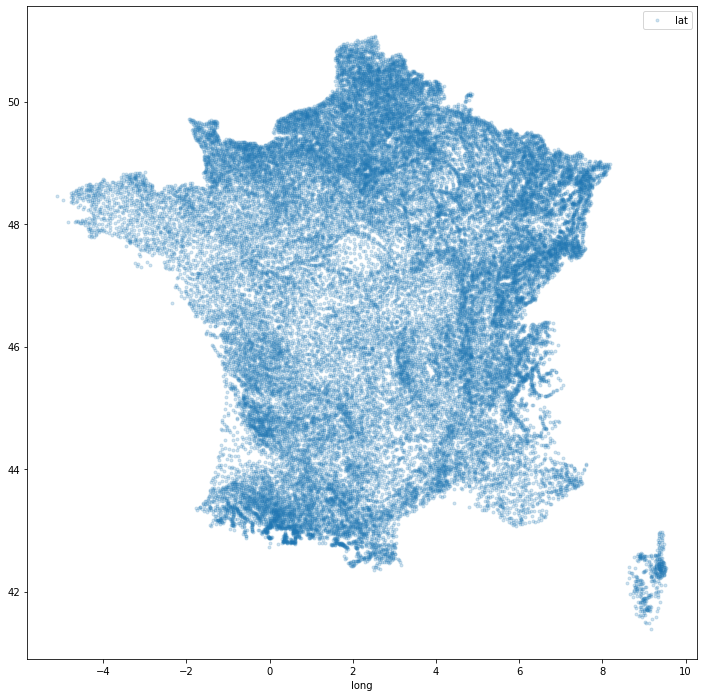

In [10]:
# Dessin standard : tous les points centraux des communes (il y en a beaucoup)
dataset2010.plot(x='long',y='lat',style='.',alpha=0.2,figsize=(12,12));

### dessin avec matplotlib

In [11]:
import numpy as np
#import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

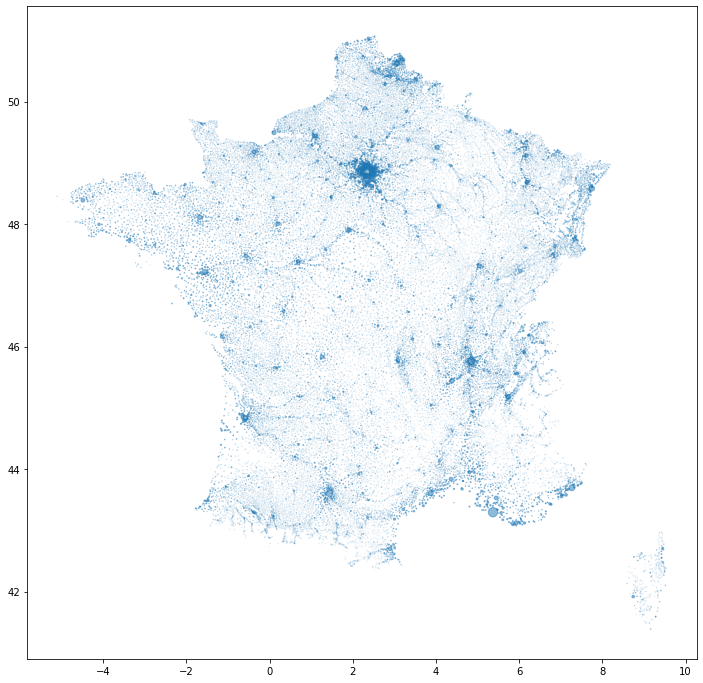

In [12]:
plt.figure(figsize=(12,12))
plt.scatter(dataset2010['long'], dataset2010['lat'], dataset['pop_2010']*0.0001, alpha=0.5)
plt.show()

## 2. Introduction de la librairie H3

In [13]:
import h3

In [14]:
# démonstration et vérification que H3 fonctionne réellement ; impression attendue '831f90fffffffff'
lat, lng, res= 48.5, 2.20, 3
h3.geo_to_h3(lat, lng, res)

'831fb0fffffffff'

In [15]:
lat, lng, res= 48.5, 2.20, 7
h3.geo_to_h3(lat, lng, res)

'871fb0d13ffffff'

### examen de la fonction `geo_to_h3(coords, res = 7)`

+ coords : numeric vector, matrix or data.frame with [lat, lng] pairs; object of class sf (geometry type: POINT)
+ res	: resolution of hexagons to return; number between 0 and 15

In [16]:
######### Temps pour l'utilisation réelle de H3 avec l'ensemble de données #########

3 concepts: geoserie, **apply**, fonction anonyme, **assign**

+ une dataframe de geopandas est composée de geoserie
+ avec la méthodes `apply` on va créer une geoserie contenant les H3-index, en itérant ligne par ligne sur la dataframe
+ [fonction anonyme lambda](https://www.w3schools.com/python/python_lambda.asp) , la syntaxe est lambda row: h3.geo_to_h3(row.lat, row.long, resolution)
+ avec la méthode `assign` on rajoute une colonne.  


In [17]:
# pour tous les points de données avec lat/long, nous ajoutons l'hex_id correspondant 
#(pas unique ici, plusieurs communes tomberont dans le même hexagone)

# valeurs pour résolution plus petite = hexagones plus grands ; 
#quelque chose comme 3-6 est une fourchette raisonnable.
resolution = 5

# on crée une géo série avec apply à partir de la dataframe + 
hex_ids = dataset2010.apply(lambda row: h3.geo_to_h3(row.lat, row.long, resolution), axis = 1)
dataset2010 = dataset2010.assign(hex_id=hex_ids.values)


In [18]:
hex_ids

0        851fb467fffffff
1        851fb0cffffffff
2        851fb08ffffffff
3        851fb013fffffff
4        851fb007fffffff
              ...       
36313    851eb3d7fffffff
36314    851eb01bfffffff
36315    851eb07bfffffff
36316    851eb07bfffffff
36317    851eb00bfffffff
Length: 36318, dtype: object

In [19]:
# index non unique
hex_ids.nunique()

2435

##### méthode nunique() : Return number of unique elements in the object.


In [20]:
dataset2010["hex_id"].nunique()

2435

In [21]:
# additionner les populations par hex_id
dataset2010byhexid = dataset2010.groupby("hex_id", as_index=False).agg({"pop_2010": "sum"})

In [22]:
dataset2010byhexid.columns = ["hex_id", "value"]
dataset2010byhexid

hex_id         value
0     85184093fffffff   4353.273007
1     85184097fffffff    819.840133
2     85184403fffffff  18457.763334
3     85184407fffffff  24902.084872
4     8518440bfffffff  15145.455752
...               ...           ...
2430  8539759bfffffff     57.674708
2431  853975a3fffffff    401.617012
2432  853975a7fffffff   2508.909874
2433  853975b3fffffff   6063.471478
2434  853975b7fffffff    225.246743

[2435 rows x 2 columns]

In [23]:
# cartographier les populations par hexagone en centiles à la place, afin de s'assurer que nous utilisons bien notre gamme de couleurs !
import scipy.stats as scs

+ Percentile
+ Liste en compréhension


In [24]:
dataset2010byhexid["centile"] = [scs.percentileofscore(dataset2010byhexid["value"].values, i)\
                                 for i in dataset2010byhexid["value"].values]

#### à propos du centile :

In [25]:
dataset2010byhexid

hex_id         value    centile
0     85184093fffffff   4353.273007  21.190965
1     85184097fffffff    819.840133   2.094456
2     85184403fffffff  18457.763334  71.786448
3     85184407fffffff  24902.084872  79.794661
4     8518440bfffffff  15145.455752  63.901437
...               ...           ...        ...
2430  8539759bfffffff     57.674708   0.041068
2431  853975a3fffffff    401.617012   1.190965
2432  853975a7fffffff   2508.909874  10.266940
2433  853975b3fffffff   6063.471478  31.540041
2434  853975b7fffffff    225.246743   0.533881

[2435 rows x 3 columns]

In [26]:
# avons-nous vraiment besoin de les trier ?
dataset2010byhexid.sort_values(by = "value", ascending = False, inplace = True)
dataset2010byhexid

hex_id         value     centile
1840  851fb467fffffff  3.579193e+06  100.000000
1844  851fb477fffffff  1.503059e+06   99.958932
1827  851fb42bfffffff  1.037119e+06   99.917864
1839  851fb463fffffff  9.385942e+05   99.876797
2275  85396817fffffff  9.288093e+05   99.835729
...               ...           ...         ...
1492  851f9acbfffffff  1.314480e+02    0.205339
2065  85396217fffffff  1.074773e+02    0.164271
1600  851fa62bfffffff  9.701730e+01    0.123203
1490  851f9a9bfffffff  9.559230e+01    0.082136
2430  8539759bfffffff  5.767471e+01    0.041068

[2435 rows x 3 columns]

## 3. introduction de folium

In [27]:
import folium
from geojson import Feature, Point, FeatureCollection
import json

### 3.3 fonction qui crée un fichier geojson

In [28]:
def hexagons_dataframe_to_geojson(df_hex, file_output = None, column_name = "value"):
    """
    Produire le GeoJSON pour un dataframe, en précisant la géométrie à partir de la colonne "hex_id".
    et avec une propriété correspondant à celle de column_name
    """    
    list_features = []
    
    for i,row in df_hex.iterrows():
        try:
            geometry_for_row = { "type" : "Polygon", "coordinates": \
                                [h3.h3_to_geo_boundary(h=row["hex_id"],geo_json=True)]}
            feature = Feature(geometry = geometry_for_row , id=row["hex_id"], \
                              properties = {column_name : row[column_name]})
            list_features.append(feature)
        except:
            print("An exception occurred for hex " + row["hex_id"]) 

    feat_collection = FeatureCollection(list_features)
    geojson_result = json.dumps(feat_collection)
    return geojson_result

### 3.2 fonction pour recupérer une couleur

+ revoir les colormap de matplotlib
+ [Explications sur colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

In [29]:
# cm c'est pour clormap
def get_color(custom_cm, val, vmin, vmax):
    return matplotlib.colors.to_hex(custom_cm((val-vmin)/(vmax-vmin)))

### 3.3 fonction qui crée une choropleth à partir de données agrégées

In [47]:

def choropleth_map(df_aggreg, column_name = "value", border_color = 'black',\
                   fill_opacity = 0.7, color_map_name = "Blues", initial_map = None):
    """
    Creates choropleth maps given the aggregated data. initial_map can be an existing map to draw on top of.
    """    
    #colormap
    min_value = df_aggreg[column_name].min()
    max_value = df_aggreg[column_name].max()
    mean_value = df_aggreg[column_name].mean()
    print(f"valeur min pour la couleur= {min_value}, valeur max= {max_value}, \
            valeur moyenne= {mean_value}")
    print(f"décompte des cellules hexagonales : {df_aggreg['hex_id'].nunique()}")
    
    # the name of the layer just needs to be unique, put something silly there for now:
    name_layer = "Choropleth " + str(df_aggreg)
    
    # on choisit un fond de carte si l'appel de la fonction n'en précise pas
    if initial_map is None:
        initial_map = folium.Map(location= [47, 4], zoom_start=5.5, tiles="cartodbpositron")
    
    # fichier geojson crée à partie de la df
    #create geojson data from dataframe
    geojson_data = hexagons_dataframe_to_geojson(df_hex = df_aggreg, column_name = column_name)

    # on peut choisir une gamme de couleur à partir de nombreuses possibilité
    # color_map_name 'Blues' for now, many more at https://matplotlib.org/stable/tutorials/colors/colormaps.html to choose from!
    custom_cm = matplotlib.cm.get_cmap(color_map_name)

    folium.GeoJson(
        geojson_data,
        style_function=lambda feature: {
            'fillColor': get_color(custom_cm, feature['properties'][column_name], vmin=min_value, vmax=max_value),
            'color': border_color,
            'weight': 1,
            'fillOpacity': fill_opacity 
        }, 
        name = name_layer
    ).add_to(initial_map)

    return initial_map

In [48]:
hexmap = choropleth_map(df_aggreg = dataset2010byhexid, color_map_name = "Blues", column_name = "value")
hexmap

valeur min pour la couleur= 57.6747076728533, valeur max= 3579193.1917450563,             valeur moyenne= 25894.43375088638
décompte des cellules hexagonales : 2435


on a 2435 hexagones

 On modifie la colormap, cela change les couleurs , et on utilise une autre colonne, celle des centiles, pour régler ces couleurs.

 [centile et percentile](https://datascience.eu/fr/mathematiques-et-statistiques/percentiles-rang-de-percentile-et-intervalle-de-percentile-definition-et-exemples/)

In [32]:
hexmap = choropleth_map(df_aggreg = dataset2010byhexid, color_map_name = "YlOrRd", column_name = "centile")
hexmap

valeur min pour la couleur= 0.04106776180698152, valeur max= 100.0,             valeur moyenne= 50.02053388090349
décompte des cellules hexagonales : 2435


## 2. fusion de cellules ou  compacticité pour les cellules

In [33]:
# également, une autre expérience amusante : H3 peut compacter un ensemble de cellules 
# pour utiliser des cellules plus grandes lorsque cela est possible.
# La réversibilité de cette opération est garantie car elle opère au niveau des cellules, 
# qui ont toujours un seul parent.
# (même lorsqu'elles n'entrent pas complètement dans le cadre d'une cellule parentale possible).


In [34]:
compactedCells = h3.compact(dataset2010byhexid['hex_id'])

In [35]:
type(compactedCells)
""" on construit un ensemble dont la cardinalité est moindre"""

' on construit un ensemble dont la cardinalité est moindre'

Compactification de cellules --> construit une liste de cellules

In [36]:
# nous avons commencé avec ce nombre de cellules...
dataset2010byhexid['hex_id'].nunique()

2435

In [37]:
# et ils ont été réduits à ce nombre :
len(compactedCells)

389

In [38]:
# on fait une copie
dataset2010byhexid_compacted = dataset2010byhexid.copy()

In [39]:
type(dataset2010byhexid_compacted)
dataset2010byhexid_compacted

hex_id         value     centile
1840  851fb467fffffff  3.579193e+06  100.000000
1844  851fb477fffffff  1.503059e+06   99.958932
1827  851fb42bfffffff  1.037119e+06   99.917864
1839  851fb463fffffff  9.385942e+05   99.876797
2275  85396817fffffff  9.288093e+05   99.835729
...               ...           ...         ...
1492  851f9acbfffffff  1.314480e+02    0.205339
2065  85396217fffffff  1.074773e+02    0.164271
1600  851fa62bfffffff  9.701730e+01    0.123203
1490  851f9a9bfffffff  9.559230e+01    0.082136
2430  8539759bfffffff  5.767471e+01    0.041068

[2435 rows x 3 columns]

# rappel sur fonctions récursives, analyse de la  conception

In [40]:
# given hex id hid, find out if it already exists in setOfHexes, or if not, recursively check if the parent does
# (to a max level of 4, for now)
# pour un hexagone donné, vérifier s'il existe déjà dans setOfHexes, ou si ce n'est pas le cas, vérifier récursivement si le parent existe.
# (jusqu'à un niveau maximum de 4, pour l'instant)

# there must be a simpler way of doing this with built-in h3 functionality?

# fonction récursive
def findSmallestInSet(hid, setOfHexes, depth=0):
    # si on trouve le hid on le retourne
    if hid in setOfHexes or depth > 4:
        return hid
    else:
        # sinon on on cherche le parent, récursivement
        parentHex = h3.h3_to_parent(hid)
        return findSmallestInSet(parentHex, setOfHexes, depth=depth+1)

In [41]:
# translate the hex ids we had to whatever larger hex id they are a part of, from the compacted set
# traduire les identifiants hexagonaux que nous avions en un identifiant hexagonal plus grand dont ils font partie, à partir de l'ensemble compacté

dataset2010byhexid_compacted['hex_id'] = \
  dataset2010byhexid_compacted['hex_id'].map(lambda hid: findSmallestInSet(hid, compactedCells, depth=0))

In [42]:
# puisque nous avons changé les hex ids maintenant, nous devons recalculer les valeurs de population ou de clacul
# (prenons la moyenne, bien qu'elle puisse ne pas être une valeur significative dans ce cas, étant une moyenne de percentiles)
dataset2010byhexid_compacted = dataset2010byhexid_compacted.groupby('hex_id', as_index=False).agg({"centile": "mean"})

In [43]:
dataset2010byhexid_compacted

hex_id    centile
0    821f97fffffffff  47.460085
1    821fb7fffffffff  50.240121
2    831861fffffffff  55.016553
3    831863fffffffff  64.787328
4    831865fffffffff  63.297993
..               ...        ...
384  8539759bfffffff   0.041068
385  853975a3fffffff   1.190965
386  853975a7fffffff  10.266940
387  853975b3fffffff  31.540041
388  853975b7fffffff   0.533881

[389 rows x 2 columns]

In [44]:
hexmap_compacted = choropleth_map(df_aggreg = dataset2010byhexid_compacted, \
                                  color_map_name = "YlOrRd", column_name = "centile")
hexmap_compacted

valeur min pour la couleur= 0.04106776180698152, valeur max= 99.83572895277207,             valeur moyenne= 49.74439460385855
décompte des cellules hexagonales : 389


# Superposition des 2 cartes

In [45]:
both_hexmaps = choropleth_map(df_aggreg = dataset2010byhexid_compacted, \
                              column_name = "centile", color_map_name = "Greens",\
    fill_opacity = 0.4, initial_map = hexmap)
both_hexmaps

valeur min pour la couleur= 0.04106776180698152, valeur max= 99.83572895277207,             valeur moyenne= 49.74439460385855
décompte des cellules hexagonales : 389


# Références web

In [46]:
# l'Hexagone in Hexagons; Jens Andersson 2021; https://jens-wirelesscar.medium.com/

# dataset from Arthur Charpentier's post at
#  https://freakonometrics.hypotheses.org/1125
# and specifically the CSV file at
#  http://freakonometrics.free.fr/popfr19752010.csv
# population for many different years for French "communes" (regional areas) with center points for each commune

# h3 plot helper functions with Folium from Abdullah Kurkcu's blog post at
#  https://betterprogramming.pub/playing-with-ubers-hexagonal-hierarchical-spatial-index-h3-ed8d5cd7739d